### 케라스 설치 확인

In [1]:
import tensorflow as tf
from tensorflow import keras

keras.__version__

'2.4.0'

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import layers, optimizers, regularizers

### 데이터 로드 

In [3]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [4]:
import numpy as np
np.__version__

'1.19.5'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [5]:
white_wine = pd.read_csv('/content/drive/MyDrive/4/machine_learning/wine data/winequality-white.csv')
red_wine = pd.read_csv('/content/drive/MyDrive/4/machine_learning/wine data/winequality-red.csv')

### 데이터 전처리

In [6]:
display(white_wine)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...       0.32     11.8        6

[4898 rows x 12 columns]

In [7]:
display(red_wine)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.
generate_data함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.



In [8]:
def generate_data(df, t_r):

  shuf = df.sample(frac=1).reset_index(drop=True)
  rows, cols = shuf.shape
  nums = round(rows * t_r)

  train = shuf[:nums]
  test = shuf[nums:]

  Y_train = np.asarray(train['quality'])
  X_train = train.drop('quality', axis = 1)
  Y_test = np.asarray(test['quality'])
  X_test = test.drop('quality', axis = 1)

  Y_train = keras.utils.to_categorical(Y_train, num_classes=11)
  Y_test = keras.utils.to_categorical(Y_test, num_classes=11)
  
  return X_train.values, Y_train, X_test.values, Y_test

In [33]:
w_x_train, w_y_train, w_x_test, w_y_test = generate_data(white_wine, 0.7)
r_x_train, r_y_train, r_x_test, r_y_test = generate_data(red_wine, 0.7)

In [34]:
print(w_x_train.shape)
print(w_x_train)
print(w_y_train.shape)
print(w_y_train)
print(w_x_test.shape)
print(w_x_test)
print(w_y_test.shape)
print(w_y_test)

(3429, 11)
[[ 7.1    0.18   0.36  ...  3.26   0.37  12.7  ]
 [ 5.8    0.25   0.26  ...  3.29   0.38   9.3  ]
 [ 6.4    0.14   0.28  ...  3.26   0.36  10.   ]
 ...
 [ 5.5    0.34   0.26  ...  3.55   0.49  13.   ]
 [ 6.4    0.125  0.36  ...  3.15   0.5   11.7  ]
 [ 7.8    0.31   0.4   ...  3.15   0.48  11.9  ]]
(3429, 11)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1469, 11)
[[ 7.2   0.24  0.27 ...  3.2   0.44  9.  ]
 [ 6.3   0.2   0.37 ...  3.2   0.35 10.8 ]
 [ 6.6   0.23  0.2  ...  2.96  0.51  9.7 ]
 ...
 [ 7.2   0.27  0.42 ...  2.94  0.46 11.  ]
 [ 5.6   0.32  0.32 ...  3.24  0.47 11.2 ]
 [ 5.3   0.32  0.23 ...  3.18  0.53 12.2 ]]
(1469, 11)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
print(r_x_train.shape)
print(r_x_train)
print(r_y_train.shape)
print(r_y_train)
print(r_x_test.shape)
print(r_x_test)
print(r_y_test.shape)
print(r_y_test)

(1119, 11)
[[10.2    0.44   0.58  ...  3.29   0.99  12.   ]
 [ 7.7    0.43   0.25  ...  3.37   0.58  10.5  ]
 [ 8.7    0.46   0.31  ...  3.1    0.74   9.6  ]
 ...
 [11.1    0.39   0.54  ...  3.13   0.51   9.5  ]
 [ 7.7    0.915  0.12  ...  3.35   0.65  10.2  ]
 [ 6.4    0.31   0.09  ...  3.42   0.7   10.   ]]
(1119, 11)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(480, 11)
[[ 7.2   0.58  0.54 ...  3.33  0.57 10.3 ]
 [ 6.4   0.64  0.21 ...  3.59  0.66  9.8 ]
 [10.    0.29  0.4  ...  3.48  0.91  9.7 ]
 ...
 [ 7.2   0.6   0.04 ...  3.53  0.55  9.5 ]
 [ 8.9   0.31  0.57 ...  3.26  0.53  9.7 ]
 [ 7.7   0.56  0.08 ...  3.24  0.66  9.6 ]]
(480, 11)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


 ### 케라스를 이용한 모델 생성, 학습, 테스트

### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습

* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [ ]:
model = Sequential([
  Dense(32, input_dim=11, activation = 'relu'),
  Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 32)                384       
_________________________________________________________________
dense_143 (Dense)            (None, 11)                363       
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


In [ ]:
w_result = model.fit(w_x_train, w_y_train, epochs=10)

Epoch 1/10
108/108 [==============================] - 1s 3ms/step - loss: 7.8679 - accuracy: 0.2828
Epoch 2/10
108/108 [==============================] - 0s 3ms/step - loss: 1.6959 - accuracy: 0.3751
Epoch 3/10
108/108 [==============================] - 0s 3ms/step - loss: 1.4378 - accuracy: 0.4005
Epoch 4/10
108/108 [==============================] - 0s 3ms/step - loss: 1.4224 - accuracy: 0.4014
Epoch 5/10
108/108 [==============================] - 0s 3ms/step - loss: 1.3498 - accuracy: 0.4382
Epoch 6/10
108/108 [==============================] - 0s 3ms/step - loss: 1.2803 - accuracy: 0.4387
Epoch 7/10
108/108 [==============================] - 0s 3ms/step - loss: 1.3503 - accuracy: 0.4482
Epoch 8/10
108/108 [==============================] - 0s 3ms/step - loss: 1.3029 - accuracy: 0.4444
Epoch 9/10
108/108 [==============================] - 0s 3ms/step - loss: 1.3044 - accuracy: 0.4515
Epoch 10/10
108/108 [==============================] - 0s 3ms/step - loss: 1.2891 - accuracy: 0.4565

Text(0.5, 0, 'epoch')

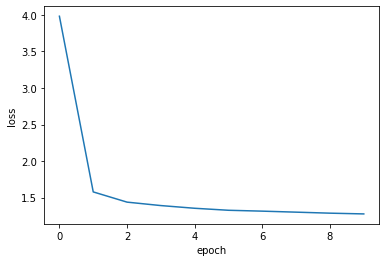

In [ ]:
import matplotlib.pyplot as plt

plt.plot(w_result.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(w_x_test,  w_y_test, verbose=2)

46/46 - 0s - loss: 1.2767 - accuracy: 0.4370


[1.276711344718933, 0.43703198432922363]

In [ ]:
model = Sequential([
  Dense(32, input_dim=11, activation = 'relu'),
  Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r_result = model.fit(r_x_train, r_y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 1s 3ms/step - loss: 16.2286 - accuracy: 0.0012
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 3.4878 - accuracy: 0.2388
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 1.4794 - accuracy: 0.4717
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 1.4448 - accuracy: 0.4735
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 1.3073 - accuracy: 0.5155
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 1.2932 - accuracy: 0.4712
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 1.2115 - accuracy: 0.4979
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 1.2310 - accuracy: 0.4958
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 1.2835 - accuracy: 0.4668
Epoch 10/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1651 - accuracy: 0.5381


Text(0.5, 0, 'epoch')

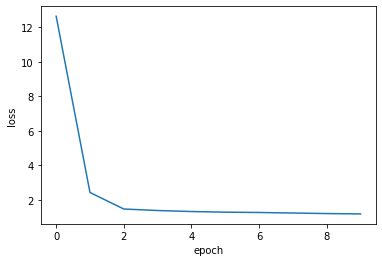

In [ ]:
plt.plot(r_result.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(r_x_test,  r_y_test, verbose=2)

15/15 - 0s - loss: 1.2668 - accuracy: 0.4875


[1.2667924165725708, 0.48750001192092896]

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용

* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [ ]:
model2 = Sequential([
  Dense(128, activation='relu', input_dim=11),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dense(11, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 128)               1536      
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_69 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_129 (Dense)            (None, 11)                363       
Total params: 12,235
Trainable params: 12,235
Non-trainable params: 0
_________________________________________________

In [ ]:
w_result = model2.fit(w_x_train, w_y_train, epochs=300, validation_split = 0.2, batch_size=64)

Epoch 1/300
43/43 [==============================] - 1s 9ms/step - loss: 6.1800 - accuracy: 0.2815 - val_loss: 1.3872 - val_accuracy: 0.3571
Epoch 2/300
43/43 [==============================] - 0s 5ms/step - loss: 1.4236 - accuracy: 0.4018 - val_loss: 1.3290 - val_accuracy: 0.4475
Epoch 3/300
43/43 [==============================] - 0s 5ms/step - loss: 1.3523 - accuracy: 0.4091 - val_loss: 1.3106 - val_accuracy: 0.4475
Epoch 4/300
43/43 [==============================] - 0s 5ms/step - loss: 1.3444 - accuracy: 0.4011 - val_loss: 1.3216 - val_accuracy: 0.4475
Epoch 5/300
43/43 [==============================] - 0s 5ms/step - loss: 1.3339 - accuracy: 0.3989 - val_loss: 1.3020 - val_accuracy: 0.4300
Epoch 6/300
43/43 [==============================] - 0s 5ms/step - loss: 1.3517 - accuracy: 0.4140 - val_loss: 1.2975 - val_accuracy: 0.4475
Epoch 7/300
43/43 [==============================] - 0s 5ms/step - loss: 1.3202 - accuracy: 0.4345 - val_loss: 1.3058 - val_accuracy: 0.4475
Epoch 8/300
4

Text(0.5, 0, 'epoch')

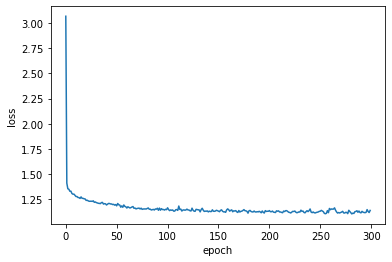

In [ ]:
import matplotlib.pyplot as plt

plt.plot(w_result.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model2.evaluate(w_x_test,  w_y_test, verbose=2)

46/46 - 0s - loss: 1.1031 - accuracy: 0.5248


[1.1031073331832886, 0.5248468518257141]

In [ ]:
model2 = Sequential([
  Dense(128, activation='relu', input_dim=11),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dense(11, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r_result = model2.fit(r_x_train, r_y_train, epochs=300, validation_split = 0.2, batch_size=64)

Epoch 1/300
14/14 [==============================] - 0s 11ms/step - loss: 1.4605 - accuracy: 0.5061 - val_loss: 1.0852 - val_accuracy: 0.5938
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 1.1188 - accuracy: 0.5196 - val_loss: 1.0500 - val_accuracy: 0.6339
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 1.0798 - accuracy: 0.5352 - val_loss: 1.0389 - val_accuracy: 0.6384
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 1.0673 - accuracy: 0.5341 - val_loss: 1.0177 - val_accuracy: 0.6384
Epoch 5/300
14/14 [==============================] - 0s 7ms/step - loss: 1.0332 - accuracy: 0.5542 - val_loss: 0.9962 - val_accuracy: 0.6518
Epoch 6/300
14/14 [==============================] - 0s 6ms/step - loss: 1.0309 - accuracy: 0.5542 - val_loss: 1.0059 - val_accuracy: 0.6384
Epoch 7/300
14/14 [==============================] - 0s 6ms/step - loss: 1.0292 - accuracy: 0.5698 - val_loss: 0.9949 - val_accuracy: 0.6116
Epoch 8/300


Text(0.5, 0, 'epoch')

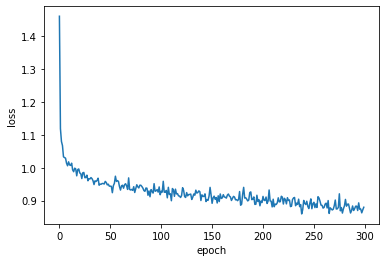

In [ ]:
plt.plot(r_result.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model2.evaluate(r_x_test,  r_y_test, verbose=2)

15/15 - 0s - loss: 1.0686 - accuracy: 0.5708


[1.0686428546905518, 0.5708333253860474]

###3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류

In [19]:
wine = pd.concat([red_wine, white_wine], ignore_index=True)

In [20]:
display(wine)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4              0.70         0.00  ...       0.56      9.4        5
1               7.8              0.88         0.00  ...       0.68      9.8        5
2               7.8              0.76         0.04  ...       0.65      9.8        5
3              11.2              0.28         0.56  ...       0.58      9.8        6
4               7.4              0.70         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
6492            6.2              0.21         0.29  ...       0.50     11.2        6
6493            6.6              0.32         0.36  ...       0.46      9.6        5
6494            6.5              0.24         0.19  ...       0.46      9.4        6
6495            5.5              0.29         0.30  ...       0.38     12.8        7
6496            6.0              0.21         0.38  ...       0.32     11.8        6

[6497 rows x 12 columns]

In [21]:
x_train, y_train, x_test, y_test = generate_data(wine, 0.7)

In [22]:
model3 = Sequential([
  Dense(128, activation='relu', input_dim=11),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dense(11, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
result = model3.fit(x_train, y_train, epochs=300, validation_split = 0.2, batch_size=64)

Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 4.3914 - accuracy: 0.3211 - val_loss: 1.3405 - val_accuracy: 0.3440
Epoch 2/300
57/57 [==============================] - 0s 3ms/step - loss: 1.3371 - accuracy: 0.4053 - val_loss: 1.2915 - val_accuracy: 0.4242
Epoch 3/300
57/57 [==============================] - 0s 3ms/step - loss: 1.3297 - accuracy: 0.4336 - val_loss: 1.2901 - val_accuracy: 0.4242
Epoch 4/300
57/57 [==============================] - 0s 3ms/step - loss: 1.2961 - accuracy: 0.4293 - val_loss: 1.2900 - val_accuracy: 0.4242
Epoch 5/300
57/57 [==============================] - 0s 3ms/step - loss: 1.2831 - accuracy: 0.4395 - val_loss: 1.2756 - val_accuracy: 0.4330
Epoch 6/300
57/57 [==============================] - 0s 3ms/step - loss: 1.2728 - accuracy: 0.4292 - val_loss: 1.2915 - val_accuracy: 0.4242
Epoch 7/300
57/57 [==============================] - 0s 3ms/step - loss: 1.2611 - accuracy: 0.4485 - val_loss: 1.2860 - val_accuracy: 0.4253
Epoch 8/300
5

Text(0.5, 0, 'epoch')

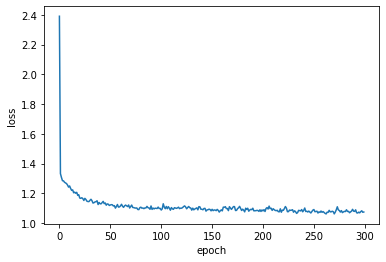

In [24]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [25]:
model3.evaluate(x_test,  y_test, verbose=2)

61/61 - 0s - loss: 1.1144 - accuracy: 0.5259


[1.114389181137085, 0.5259107351303101]